# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df= pd.read_csv("licfile.csv", header=None, dtype={"EXPIRATION": str})
df.head(2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

In [4]:
df.columns= ['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1','BIZLINE2','BIZCITYSTATE','BIZTELEPHONE','EXPIRATION','OWNER','MAILLINE1','MAILLINE2','MAILCITYSTATE','MAILCOUNTYCODE','MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG']


In [5]:
df.columns

Index(['LICTYPE', 'LICNUMBER', 'BIZCOUNTY', 'BIZNAME', 'BIZLINE1', 'BIZLINE2',
       'BIZCITYSTATE', 'BIZTELEPHONE', 'EXPIRATION', 'OWNER', 'MAILLINE1',
       'MAILLINE2', 'MAILCITYSTATE', 'MAILCOUNTYCODE', 'MAILCOUNTY', 'MAILZIP',
       'TELEPHONE', 'LICSUBTYPE', 'CEFLAG'],
      dtype='object')

# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [6]:
columns= ['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1','BIZLINE2','BIZCITYSTATE','BIZTELEPHONE','EXPIRATION','OWNER','MAILLINE1','MAILLINE2','MAILCITYSTATE','MAILCOUNTYCODE','MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG']
df = pd.read_csv("licfile.csv", names =columns, dtype ={'EXPIRATION': str, 'LICNUMBER': str, 'MAILCOUNTYCODE': str, 'MAILZIP':str, 'TELEPHONE': str})
df.head(3)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [7]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [8]:
df['EXPIRATION'] = pd.to_datetime(df['EXPIRATION'], format ='%m%d%Y').dt.strftime('%Y-%m-%d')

Check the first five expirations to make sure they look right.

In [9]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [10]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [11]:
df.LICTYPE.value_counts().tail(10)

Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Booting CE Provider                                3
Cosmetology Wig Instructor                         2
Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Mobile Cosmetology Manicure Specialty Saloon       2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [12]:
df.LICTYPE.str.contains("Electrician").dropna()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
597786    False
597787    False
597788    False
597789    False
597790    False
597791    False
597792    False
597793    False
597794    False
597795    False
597796    False
597797    False
597798    False
597799    False
597800    False
597801    False
597802    False
597803    False
597804    False
597805    False
597806    False
597807    False
597808    False
597809    False
597810    False
597811    False
597812    False
597813    False
597814    False
597815    False
Name: LICTYPE, Length: 5

## 8. How many of the rows of LICTYPE are NaN?

In [13]:
df.LICTYPE.str.contains("Electrician").value_counts(dropna=False)

False    418892
True     171838
NaN        7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [14]:
df[df.LICTYPE.str.contains("Electrician").fillna(False)].head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N


This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

## 10. What's the most popular kind of electrician?

In [15]:
electricians = df[df.LICTYPE.str.contains("Electrician", na =False)]
electricians.LICTYPE.value_counts()


Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

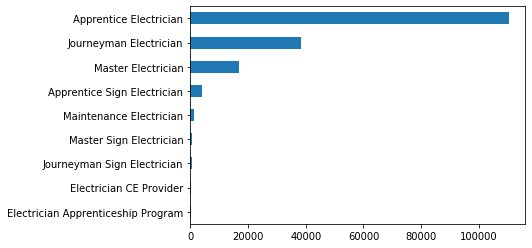

In [16]:
electricians.LICTYPE.value_counts(ascending=True).plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [17]:
sign_elec = electricians[electricians.LICTYPE.str.contains('Sign', na=False)]
sign_elec.LICTYPE.value_counts()

Apprentice Sign Electrician    3994
Master Sign Electrician         542
Journeyman Sign Electrician     391
Name: LICTYPE, dtype: int64

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [18]:
first_name_owner= df.OWNER.str.split(",").str.get(0)

In [19]:
first_name_owner

0            RISINGER
1            WILLIAMS
2             GUEVARA
3              BOWERS
4              DEMSKY
5            THOMPSON
6              TUCKER
7              COOPER
8         BLANKENSHIP
9               DAWES
10             LESTER
11            MANCILL
12         HUDDLESTON
13             JORDAN
14              IRWIN
15               HALL
16              JAMES
17             SIDAWI
18              SMITH
19           FERGUSON
20           MCKINLEY
21             SOWELL
22             SEVIER
23         SOMERVILLE
24           BARCLIFT
25               FORD
26            SCHAFER
27           MARTINEZ
28            CLEMANS
29           MARTINEZ
             ...     
597786        SNUFFER
597787       MARTINEZ
597788         YOSTEN
597789          CLICK
597790          PENSE
597791           LARA
597792          SMITH
597793      BINNICKER
597794         CHAVEZ
597795       GUERRERO
597796         SAVAGE
597797          ADAMS
597798          SCOTT
597799           HILL
597800    

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [20]:
df['LASTNAME'] = first_name_owner

In [21]:
df.head(2)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS


# 15. What are the ten most popular last names?

In [22]:
df.LASTNAME.value_counts().head()

NGUYEN      22286
TRAN         8137
LE           5606
GARCIA       5574
MARTINEZ     4701
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [23]:
df[df['LASTNAME'] == "NGUYEN"].LICTYPE.value_counts().head()


Cosmetology Manicurist     12856
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Cosmetologist               1876
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [24]:
df[df['LASTNAME'] == "TRAN"].LICTYPE.value_counts().head()

Cosmetology Manicurist     4675
Cosmetology Operator       1475
Cosmetology Esthetician    1032
Cosmetologist               712
Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [25]:
df[df['LASTNAME'] == "LE"].LICTYPE.value_counts().head()

Cosmetology Manicurist     3277
Cosmetology Operator        953
Cosmetology Esthetician     730
Cosmetologist               497
A/C Technician               43
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [26]:
df.loc[df['LASTNAME'].isin(['NGUYEN', 'TRAN', 'LE'])].LICTYPE.value_counts().head()

Cosmetology Manicurist     20808
Cosmetology Operator        6467
Cosmetology Esthetician     4643
Cosmetologist               3085
Apprentice Electrician       327
Name: LICTYPE, dtype: int64

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [27]:
df.loc[df['LASTNAME'].isin(['GARCIA', 'RODRIGUEZ', 'MARTINEZ'])].LICTYPE.value_counts().head()

Apprentice Electrician    5143
Cosmetology Operator      4451
Journeyman Electrician    1266
A/C Technician             970
Barber, Class A            473
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [28]:
df[df.LASTNAME.str.endswith('EZ', na=False)].LICTYPE.value_counts().head()

Apprentice Electrician    16065
Cosmetology Operator      13887
Journeyman Electrician     3529
A/C Technician             2889
Barber, Class A            1277
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [29]:
df[df.LASTNAME.str.endswith('EZ', na=False)].LICTYPE.value_counts(normalize=True).head()*100

Apprentice Electrician    35.975009
Cosmetology Operator      31.097725
Journeyman Electrician     7.902633
A/C Technician             6.469455
Barber, Class A            2.859638
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [30]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [31]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [32]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [33]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [132]:
df.OWNER.str.split(n=2, expand=True).get(1).head(10)

0         JIM
1         JON
2        JUAN
3       JAMES
4        JOHN
5       RANDY
6       MONTE
7      THOMAS
8       KERRY
9    NICHOLAS
Name: 1, dtype: object

In [124]:
df['FIRSTNAME'] = df.OWNER.str.split(n=2, expand=True).get(1)

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [126]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN


What do their names look like?

In [135]:
df.FIRSTNAME.isna().value_counts()

False    595212
True       2604
Name: FIRSTNAME, dtype: int64

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

How many empty first names do we have now?

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [136]:
df.FIRSTNAME.value_counts().head()

JOSE       7213
MICHAEL    5819
DAVID      5280
NAILS      5024
MARIA      5001
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [137]:
df[df.LICTYPE.str.contains("Cosmetology", na = False)].FIRSTNAME.value_counts().head()

# df[df.Other_Race.str.contains("HISP", na=False)].Other_Race.value_counts()



NAILS     4845
MARIA     4500
HAIR      3284
BEAUTY    2716
SALON     2163
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [138]:
df[df.LICTYPE.str.contains("Electr", na = False)].FIRSTNAME.value_counts().head()

JOSE        5290
ELECTRIC    3807
MICHAEL     3504
DAVID       3242
JUAN        3077
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [ ]:
!pip install gender-guesser

#### Test to see that it works

In [ ]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

In [ ]:
detector.get_gender('Jose')

In [ ]:
detector.get_gender('Maria')

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [ ]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [ ]:
import numpy as np



## 31. Do men or women have more licenses? What is the percentage of unknown genders?

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

## 31. What are the most popular licenses for men? For women?

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

(By the way, what are those tow truck jobs?)

## 33. Graph them!

And let's **give them titles** so we know which is which.

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [ ]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [ ]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

In [ ]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

In [ ]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.